In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_excel("/content/Data_Train.xlsx")

In [ ]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [ ]:
train_data.tail(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
train_data[train_data['Total_Stops'].isnull()] # checking the nan value in the row of Total_stops

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [ ]:
train_data.dropna(inplace=True) # used for droping the missing value in data frame


In [ ]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
train_data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
data = train_data.copy()

In [ ]:
data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])  # converting the data into panda datetime  objects frame


In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
for feature in ['Dep_Time','Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)

In [ ]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
data["Journey_date"] = data["Date_of_Journey"].dt.day

In [ ]:
data["Journey_month"]  = data["Date_of_Journey"].dt.month

In [ ]:
data["Journey_year"] = data["Date_of_Journey"].dt.year

In [ ]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-18 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-18 05:50:00,2025-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-18 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-04-18 18:05:00,2025-04-18 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-04-18 16:50:00,2025-04-18 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019


In [ ]:
data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
data.drop(columns=["Date_of_Journey"])

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-04-18 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-18 05:50:00,2025-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-18 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2025-04-18 18:05:00,2025-04-18 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2025-04-18 16:50:00,2025-04-18 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2025-04-18 19:55:00,2025-04-18 22:25:00,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,2025-04-18 20:45:00,2025-04-18 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2025-04-18 08:20:00,2025-04-18 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,2025-04-18 11:30:00,2025-04-18 14:10:00,2h 40m,non-stop,No info,12648,1,3,2019


In [ ]:
def extract_hour_min(df,col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [ ]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-18 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-18 05:50:00,2025-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-18 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [ ]:
extract_hour_min(data,"Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-18 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-18 05:50:00,2025-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-18 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25


In [ ]:
data.drop(columns=["Arrival_Time","Dep_Time"])

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,11,20
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,14,10


In [ ]:
data.shape

(10682, 16)

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Journey_year', 'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [ ]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Noon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

In [ ]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h'+' '+x
    elif 'm' not in x:
        x = x+' '+'0m'

    return x

In [ ]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [ ]:
data['Duration'][0]

'2h 50m'

In [ ]:
'2h 50m'.split(' ')

['2h', '50m']

In [ ]:
'2h 50m'.split(' ')[0]

'2h'

In [ ]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [ ]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [ ]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [ ]:
data['Duration_mins'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-18 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-18 05:50:00,2025-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,7,25


In [ ]:
data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


In [ ]:
data['Duration_total_mins'] = data['Duration_hours']*60 + data['Duration_mins']

In [ ]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-18 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-18 05:50:00,2025-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-18 09:25:00,2025-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,2019,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-04-18 18:05:00,2025-04-18 23:30:00,5h 25m,1 stop,No info,6218,12,5,2019,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-04-18 16:50:00,2025-04-18 21:35:00,4h 45m,1 stop,No info,13302,1,3,2019,21,35,4,45


In [ ]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Journey_year', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

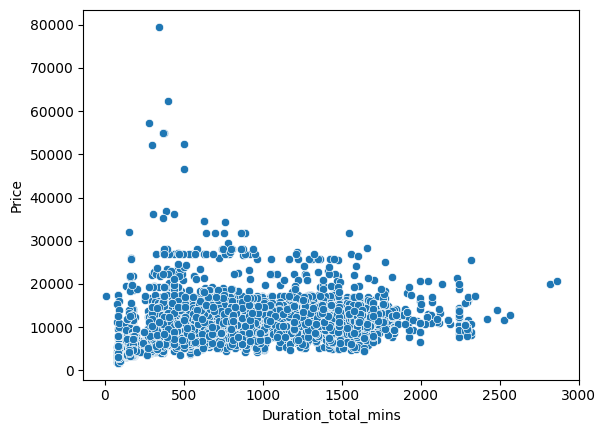

In [ ]:
sns.scatterplot(x="Duration_total_mins" , y="Price", data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

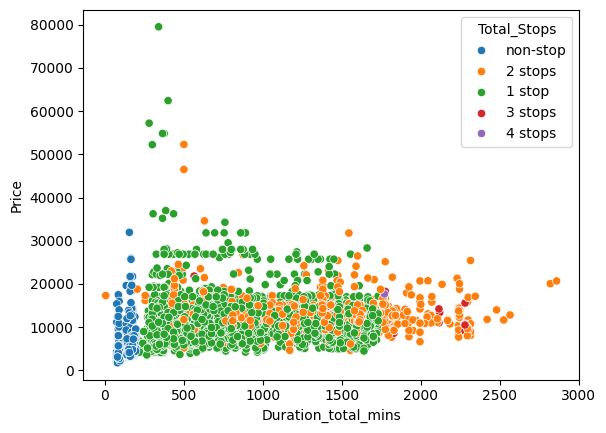

In [ ]:
sns.scatterplot(x="Duration_total_mins", y="Price", hue="Total_Stops", data=data)

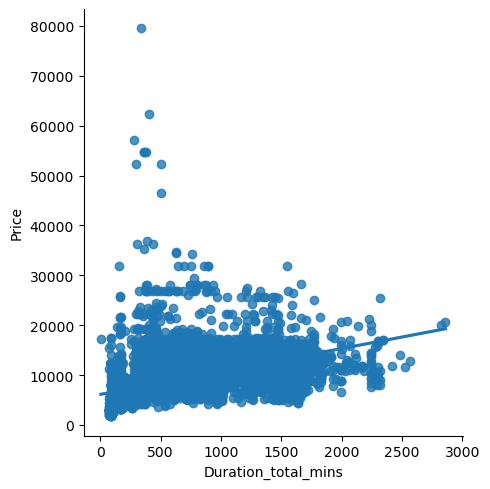

In [ ]:
#For the regression plots
sns.lmplot(x="Duration_total_mins" , y="Price", data=data)

In [ ]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
DEL → JAI → BOM → COK,207
BOM → HYD,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Journey_year', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hours', 'Duration_mins', 'Duration_total_mins'],
      dtype='object')

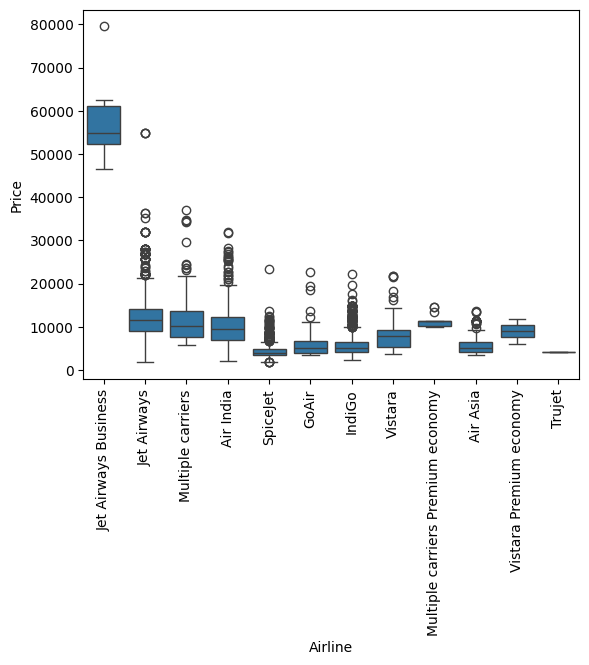

In [ ]:
sns.boxplot(y='Price' , x='Airline', data=data.sort_values('Price', ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
# Applying in one-hot encoding
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Journey_date,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,24,3,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,5,1,2019,5,50,13,15,7,25,445


In [ ]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [ ]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

In [ ]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
data['Source'].apply(lambda x : 1 if x=='Bangalore' else 0)

,Source
0,0
1,0
2,0
3,0
4,0
...,...
10678,0
10679,0
10680,0
10681,0


In [ ]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x: 1 if x==sub_category else 0)

In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-18 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-18 05:50:00,2025-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,7,25,445


In [ ]:
data['Airline'].nunique()

12

In [ ]:
# Now we  apply target guided encoding .
# First we will take out the average price of each airlines and sort them , then we will give them importance according to their price , for ex-> lowest one will get 0 , the highest will get the max . Then we will convert them into dictionary
data.groupby(['Airline'])['Price'].mean().sort_values()

,Price
Airline,
Trujet,4140.000000
SpiceJet,4338.284841
Air Asia,5590.260188
IndiGo,5673.682903
GoAir,5861.056701
Vistara,7796.348643
Vistara Premium economy,8962.333333
Air India,9612.427756
Multiple carriers,10902.678094


In [ ]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [ ]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [ ]:
dict_airlines = {key:index for index , key in enumerate(airlines,0)}

In [ ]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [ ]:
data['Airline']

,Airline
0,3
1,7
2,10
3,3
4,3
...,...
10678,2
10679,7
10680,10
10681,5


In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-18 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,2,50,170
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-18 05:50:00,2025-04-18 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,7,25,445
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-18 09:25:00,2025-06-10 04:25:00,19h 0m,2 stops,No info,13882,9,6,2019,4,25,19,0,1140


In [ ]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [ ]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [ ]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dict_dest = {key:index for index , key in enumerate(dest,0)}

In [ ]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
data['Destination']= data['Destination'].map(dict_dest)

In [ ]:
data['Destination']

,Destination
0,2
1,3
2,4
3,3
4,2
...,...
10678,3
10679,3
10680,2
10681,2


In [ ]:
#Here we have converted the destination column into a numerical column so that ML algorithm can learn from the numerical values
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2 stops,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2 stops,No info,...,4,25,19,0,1140,0,0,1,0,0


In [ ]:
#Now we are doing encoding on the Total Stop column to convert it into numerical data
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [ ]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [ ]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [ ]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,...,1,10,2,50,170,1,0,0,0,0


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
#Now we can see that most of the flights donot have any information provided to us . Thus we cam drop this Additional_info column

In [ ]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,0,No info,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2,No info,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2,No info,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,2024-06-25 18:05:00,2024-06-25 23:30:00,5h 25m,1,No info,...,23,30,5,25,325,0,1,0,0,0


In [ ]:
#We can also drop this route feature as we can can infer about it from the combination of total_stop feature and the destination feature

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_date', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
data.drop(columns=['Date_of_Journey','Additional_Info','Duration_total_mins','Source','Journey_year'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Price', 'Journey_date', 'Journey_month',
       'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [ ]:
data.drop(columns=['Route'], axis=1, inplace=True)

In [ ]:
data.head(3)

,Airline,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2024-06-25 22:20:00,2024-03-22 01:10:00,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2024-06-25 05:50:00,2024-06-25 13:15:00,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2024-06-25 09:25:00,2024-06-10 04:25:00,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [ ]:
data.drop(columns=['Duration'], axis=1, inplace=True)

In [ ]:
data.head(3)

,Airline,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2024-06-25 22:20:00,2024-03-22 01:10:00,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2024-06-25 05:50:00,2024-06-25 13:15:00,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2024-06-25 09:25:00,2024-06-10 04:25:00,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [ ]:
data.drop(columns=['Dep_Time','Arrival_Time'], axis=1, inplace=True)

In [ ]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [ ]:
# Now we will perform outlier detection and furthur we will know how to deal with the outlier
# Outliers are the value which can somewhat be extremely low or extremely high
# One of the best method to identify a outlier is by data visualisation
# We can use a box plot for this matter to identify an outlier

In [ ]:
# So we will use 3 plots -> distribution , box plot and histogram to visualise the data and look at the outliers present

In [ ]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

    sns.histplot(df[col], kde=True, ax=ax1)
    sns.boxplot(x=df[col], ax=ax2)
    sns.histplot(df[col], kde=False, ax=ax3)

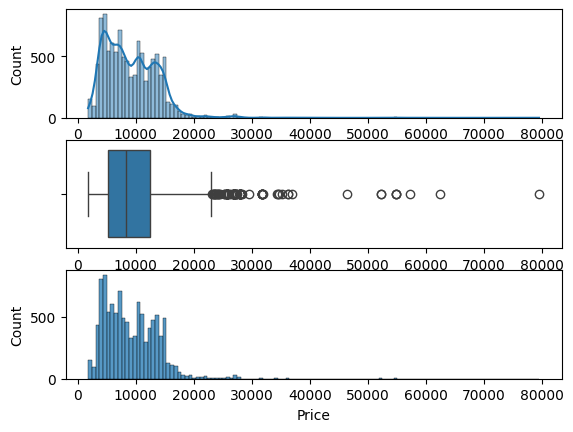

In [ ]:
plot(data, 'Price')

In [ ]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr=q3-q1

maximum = q3+ 1.5*iqr
minimum = q1-1.5*iqr

In [ ]:
print(maximum)

23017.0


In [ ]:
print(minimum)

-5367.0


In [ ]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [ ]:
len([price for price in data['Price'] if price>maximum or price<minimum])

94

In [ ]:
data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

In [ ]:
# We replace by the median insteas of mean because if we replace all the values to the mean , then the net mean would change , whereas median is a middle value so it wont affect the mean so much

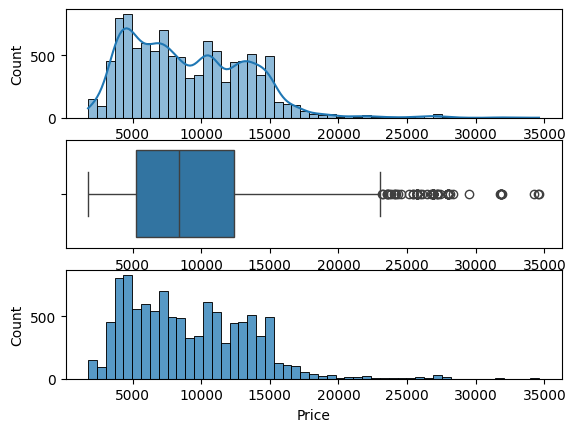

In [ ]:
plot(data, 'Price')

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Handle 'Total_Stops' - Ordinal Label Encoding (assuming a standard order)
stops_mapping = {
    'Non-Stop': 0,
    '1 Stop': 1,
    '2 Stops': 2,
    '3 Stops': 3,  # Add this if it exists in your data
    '4 Stops': 4 # Add this if it exists in your data.  Important to maintain order.
}
data['Total_Stops'] = data['Total_Stops'].map(stops_mapping)

# Check unique values and their counts for 'Route' and 'Additional_Info' to decide on encoding
print("Unique values and counts for 'Route':")
print(data['Route'].value_counts())
print("\nUnique values and counts for 'Additional_Info':")
print(data['Additional_Info'].value_counts())

# Decide what to do with Route and Additional Info.
# Use One-Hot Encoding for 'Route' with scikit-learn
num_unique_routes = len(data['Route'].unique())
if num_unique_routes <= 50: #  <---  You can adjust this threshold
    # Create an instance of OneHotEncoder
    ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop_first to avoid perfect multicollinearity, sparse_output=False for easier handling

    # Fit and transform the 'Route' column
    route_encoded = ohe.fit_transform(data[['Route']])

    # Get the feature names after encoding
    route_encoded_df = pd.DataFrame(route_encoded, columns=ohe.get_feature_names_out(['Route']))

    # Concatenate the encoded features with the original DataFrame
    data = pd.concat([data.reset_index(drop=True), route_encoded_df.reset_index(drop=True)], axis=1)

    # Drop the original 'Route' column
    data.drop(columns=['Route'], inplace=True)
    print("\n'Route' has been one-hot encoded using scikit-learn.")
else:
    print(f"\n'Route' has {num_unique_routes} unique values. Consider a different encoding method (e.g., Target Encoding, or feature reduction) instead of one-hot encoding.")
    #  Target Encoding for Route (Example -  similar to what you did for Airline/Destination)
    route_means = data.groupby('Route')['Price'].mean().sort_values()
    route_mapping = {route: index for index, route in enumerate(route_means.index, 0)}
    data['Route'] = data['Route'].map(route_mapping)
    print("\n'Route' has been target encoded.")


# Handle 'Additional_Info' - Drop (if it has too many unique values or seems uninformative)
#  It often does not contribute much.  Check the value_counts() output.
data.drop(columns=['Additional_Info'], inplace=True)
print("\n'Additional_Info' column has been dropped.")

# Display the updated DataFrame's head and info to see the changes
print("\nUpdated DataFrame head:")
print(data.head())
print("\nUpdated DataFrame info:")
print(data.info())



Unique values and counts for 'Route':
Route
DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BOM → VNS → DEL → HYD                   1
BLR → HBX → BOM → NAG → DEL             1
BLR → BOM → IXC → DEL                   1
BLR → CCU → BBI → HYD → VGA → DEL       1
BOM → BBI → HYD                         1
Name: count, Length: 128, dtype: int64

Unique values and counts for 'Additional_Info':
Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your DataFrame is named 'data'

# 1. Data Splitting
# Define your features (X) and target variable (y)
#  Include all the numerical columns and the encoded categorical ones
X = data.drop('Price', axis=1)  # Features (exclude 'Price')
y = data['Price']  # Target variable

# Identify datetime columns
datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns
print("Datetime columns",datetime_cols)

# Convert datetime columns to numerical representation (e.g., timestamp)
for col in datetime_cols:
    X[col] = pd.to_numeric(X[col])
    print(f"Converted column '{col}' to numeric.")



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test, random_state for reproducibility

print("Data has been split into training and testing sets.")
print(f"Training set size: X_train.shape={X_train.shape}, y_train.shape={y_train.shape}")
print(f"Testing set size:  X_test.shape={X_test.shape}, y_test.shape={y_test.shape}")


# 2. Feature Selection (Basic -  You'll likely want to refine this)
#   For this first example, I'll use all available features after the previous steps.
#   In a real project, you'd want to carefully select the most relevant features.
print("\nFeatures used for regression:")
print(X_train.columns)
print("\nData types of X_train:")
print(X_train.dtypes)


# 3. Model Training
# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("\nLinear Regression model has been trained.")

# 4. Model Evaluation
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")  #  Format to 2 decimal places
print(f"R-squared (R2): {r2:.2f}")

# 5. Print the coefficients
print("\nCoefficients:")
print(model.coef_)



Datetime columns Index(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], dtype='object')
Converted column 'Date_of_Journey' to numeric.
Converted column 'Dep_Time' to numeric.
Converted column 'Arrival_Time' to numeric.
Data has been split into training and testing sets.
Training set size: X_train.shape=(8545, 17), y_train.shape=(8545,)
Testing set size:  X_test.shape=(2137, 17), y_test.shape=(2137,)

Features used for regression:
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Journey_date',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins'],
      dtype='object')

Data types of X_train:
Airline                  int64
Date_of_Journey          int64
Source                  object
Destination              int64
Route                    int64
Dep_Time                 int64
Arrival_Time             int

ValueError: could not convert string to float: 'Delhi'

In [ ]:
print(X_train.dtypes)



Airline                  int64
Date_of_Journey          int64
Source                  object
Destination              int64
Route                    int64
Dep_Time                 int64
Arrival_Time             int64
Duration                object
Total_Stops            float64
Journey_date             int32
Journey_month            int32
Journey_year             int32
Arrival_Time_hour        int32
Arrival_Time_minute      int32
Duration_hours           int64
Duration_mins            int64
Duration_total_mins      int64
dtype: object


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import random
from sklearn.base import clone
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingRegressor # Added
from sklearn.pipeline import Pipeline # Added
from sklearn.model_selection import GridSearchCV # Added


# Assuming your DataFrame is named 'data'

# 1. Data Preprocessing
# Handle 'Total_Stops' - Ordinal Label Encoding
stops_mapping = {
    'Non-Stop': 0,
    '1 Stop': 1,
    '2 Stops': 2,
    '3 Stops': 3,
    '4 Stops': 4
}
data['Total_Stops'] = data['Total_Stops'].map(stops_mapping)

# # One-hot encode the 'Source' column using scikit-learn  <- Removed
# ohe = OneHotEncoder(drop='first', sparse_output=False)
# source_encoded = ohe.fit_transform(data[['Source']])
# source_encoded_df = pd.DataFrame(source_encoded, columns=ohe.get_feature_names_out(['Source']))
# data = pd.concat([data.reset_index(drop=True), source_encoded_df.reset_index(drop=True)], axis=1)

# Drop the original 'Duration' column
data.drop(columns=['Duration'], inplace=True, errors='ignore') # Added errors='ignore'


# Identify datetime columns
datetime_cols = data.select_dtypes(include=['datetime64[ns]']).columns

# Convert datetime columns to numerical representation
for col in datetime_cols:
    data[col] = pd.to_numeric(data[col])



# 2. Data Splitting
# Define your features (X) and target variable (y)
X = data.drop('Price', axis=1)  # Features (exclude 'Price')
y = data['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 3. Handle Missing Values and Scaling
# Create a pipeline to handle missing values and scaling
numeric_cols = X_train.select_dtypes(include=np.number).columns
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())                # Scale numerical features
])

# Fit and transform, then convert back to DataFrame
X_train[numeric_cols] = pd.DataFrame(preprocessor.fit_transform(X_train[numeric_cols]),
                                     index=X_train.index,
                                     columns=numeric_cols)
X_test[numeric_cols] = pd.DataFrame(preprocessor.transform(X_test[numeric_cols]),
                                    index=X_test.index,
                                    columns=numeric_cols)



# 4. Feature Selection using Genetic Algorithm
def evaluate_chromosome(chromosome, X_train, y_train, X_test, y_test):
    """Evaluates the fitness of a chromosome (feature subset)."""
    selected_features = X_train.columns[chromosome == 1]
    if len(selected_features) == 0:
        return float('inf'), 0  # Penalize empty feature sets

    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2  # Fitness is MSE (lower is better), also return R2

def create_initial_population(num_chromosomes, num_features):
    """Creates an initial population of chromosomes."""
    population = []
    for _ in range(num_chromosomes):
        # Initialize chromosome with a random selection of features (more zeros)
        chromosome = np.random.choice([0, 1], size=num_features, p=[0.8, 0.2])  # Adjust probability as needed
        population.append(chromosome)
    return np.array(population)

def select_parents(population, fitnesses, num_parents=2):
    """Selects parents for crossover using tournament selection."""
    parents = []
    for _ in range(num_parents):
        tournament_indices = random.sample(range(len(population)), 3)  # Tournament size = 3
        tournament_fitnesses = [fitnesses[i][0] for i in tournament_indices] #get MSE
        winner_index = tournament_indices[np.argmin(tournament_fitnesses)]  #select the one with the lowest MSE
        parents.append(population[winner_index])
    return np.array(parents)

def crossover(parents, crossover_rate=0.8):
    """Performs single-point crossover between two parents."""
    offspring = []
    parent1, parent2 = parents
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(parents[0]) - 1)
        offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        offspring.extend([offspring1, offspring2])
    else:
        offspring.extend([parent1.copy(), parent2.copy()])
    return np.array(offspring)

def mutate(chromosome, mutation_rate=0.01):
    """Mutates a chromosome by flipping bits with a given probability."""
    mutated_chromosome = chromosome.copy()
    for i in range(len(mutated_chromosome)):
        if random.random() < mutation_rate:
            mutated_chromosome[i] = 1 - mutated_chromosome[i]  # Flip bit
    return mutated_chromosome

def genetic_algorithm(X_train, y_train, X_test, y_test, num_generations=100, population_size=50, crossover_rate=0.8, mutation_rate=0.01):
    """Performs genetic algorithm for feature selection."""
    num_features = X_train.shape[1]
    population = create_initial_population(population_size, num_features)
    best_chromosome = None
    best_fitness = float('inf')
    best_r2 = 0
    all_fitnesses = []

    for generation in range(num_generations):
        # 1. Evaluate fitness of each chromosome
        fitnesses = [evaluate_chromosome(chromosome, X_train, y_train, X_test, y_test) for chromosome in population]
        all_fitnesses.append(fitnesses)

        # 2. Find the best chromosome in the current generation
        current_best_index = np.argmin([f[0] for f in fitnesses]) #find the index of the min MSE
        current_best_fitness = fitnesses[current_best_index][0]
        current_best_r2 = fitnesses[current_best_index][1]

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_r2 = current_best_r2
            best_chromosome = population[current_best_index].copy()
            print(f"Generation {generation}: Best MSE = {best_fitness:.2f}, Best R2 = {best_r2:.2f}")

        # 3. Select parents for crossover
        parents = select_parents(population, fitnesses, num_parents=2)

        # 4. Create offspring through crossover and mutation
        offspring = []
        for i in range(0, population_size, 2):
            if i + 1 < population_size:
                new_offspring = crossover(parents[[0,1]], crossover_rate) #select two parents
                offspring.extend(new_offspring)
            parents = np.roll(parents, shift=1, axis=0)

        #mutation
        mutated_offspring = [mutate(child, mutation_rate) for child in offspring]
        population = np.array(mutated_offspring)

    return best_chromosome, best_fitness, best_r2, all_fitnesses



# 5. Perform GA for feature selection
best_features_mask, best_mse, best_r2, all_fitnesses = genetic_algorithm(X_train, y_train, X_test, y_test, num_generations=50, population_size=50, crossover_rate=0.8, mutation_rate=0.01) #set to 50 to reduce time
selected_features = X_train.columns[best_features_mask == 1]

print("\nGenetic Algorithm Feature Selection:")
print(f"Selected Features: {selected_features}")
print(f"Best MSE: {best_mse:.2f}")
print(f"Best R2: {best_r2:.2f}")



# 6. Train a Gradient Boosting Regression model with the selected features and hyperparameter tuning
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


# Define the parameter grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'random_state': [42]
}

# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gbr, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1) #cv=3

# Fit the model with the best hyperparameters
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_gbr = grid_search.best_estimator_

# Make predictions on the test set
y_pred_gbr = best_gbr.predict(X_test_selected)

# Evaluate the model performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Regression with Selected Features and Tuned Hyperparameters:")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"R-squared (R2): {r2_gbr:.2f}")

import matplotlib.pyplot as plt
# Plot the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot([min([f[0] for f in gen_fitnesses]) for gen_fitnesses in all_fitnesses])  # Plot the minimum MSE of each generation
plt.xlabel("Generation")
plt.ylabel("Minimum MSE")
plt.title("Genetic Algorithm Convergence")
plt.grid(True)
plt.show()


ValueError: Shape of passed values is (8545, 18), indices imply (8545, 19)

Generation 0: Best MSE = 7974719.92, Best R2 = 0.60
Generation 7: Best MSE = 7928736.63, Best R2 = 0.61
Generation 8: Best MSE = 7295333.14, Best R2 = 0.64
Generation 14: Best MSE = 7210080.03, Best R2 = 0.64
Generation 16: Best MSE = 7090924.64, Best R2 = 0.65
Generation 22: Best MSE = 7088906.23, Best R2 = 0.65
Generation 26: Best MSE = 6896313.31, Best R2 = 0.66
Generation 27: Best MSE = 6891223.53, Best R2 = 0.66
Generation 28: Best MSE = 6881998.71, Best R2 = 0.66
Generation 29: Best MSE = 6881589.80, Best R2 = 0.66
Generation 30: Best MSE = 6880800.67, Best R2 = 0.66

Genetic Algorithm Feature Selection:
Selected Features: Index(['Airline', 'Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time',
       'Journey_date', 'Journey_month', 'Source_Delhi', 'Source_Mumbai'],
      dtype='object')
Best MSE: 6880800.67
Best R2: 0.66
Fitting 3 folds for each of 27 candidates, totalling 81 fits

Gradient Boosting Regression with Selected Features and Tuned Hyperparameters:
Mean Squared Erro

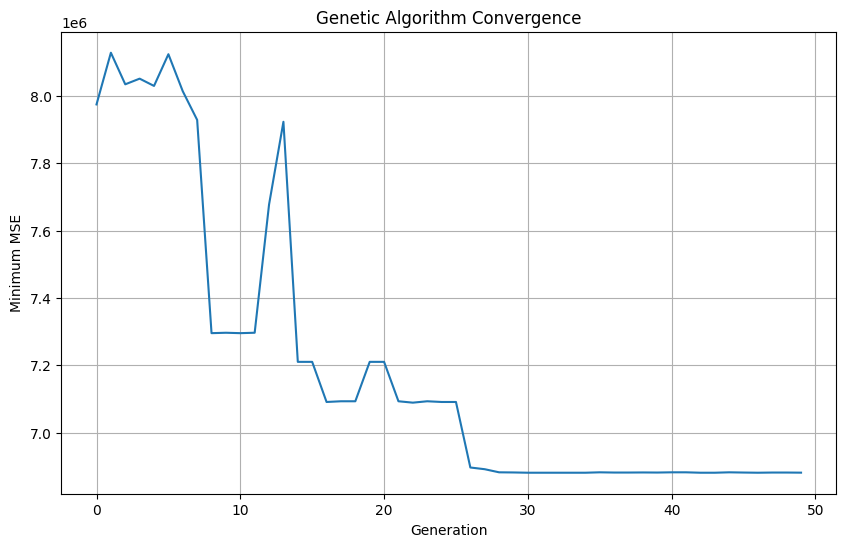

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import random
from sklearn.base import clone
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import GradientBoostingRegressor # Added
from sklearn.pipeline import Pipeline # Added
from sklearn.model_selection import GridSearchCV # Added


# Assuming your DataFrame is named 'data'

# 1. Data Preprocessing
# Handle 'Total_Stops' - Ordinal Label Encoding
stops_mapping = {
    'Non-Stop': 0,
    '1 Stop': 1,
    '2 Stops': 2,
    '3 Stops': 3,
    '4 Stops': 4
}
data['Total_Stops'] = data['Total_Stops'].map(stops_mapping)

# Drop the original 'Duration' column
data.drop(columns=['Duration'], inplace=True, errors='ignore')  # Added errors='ignore'

# Identify datetime columns
datetime_cols = data.select_dtypes(include=['datetime64[ns]']).columns

# Convert datetime columns to numerical representation
for col in datetime_cols:
    data[col] = pd.to_numeric(data[col])


# 2. Data Splitting
# Define your features (X) and target variable (y)
X = data.drop('Price', axis=1)  # Features (exclude 'Price')
y = data['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3. Handle Missing Values and Scaling
# Create a pipeline to handle missing values and scaling
numeric_cols = X_train.select_dtypes(include=np.number).columns

# Remove fully NaN columns before preprocessing
X_train = X_train.dropna(axis=1, how='all')
X_test = X_test.dropna(axis=1, how='all')
numeric_cols = X_train.select_dtypes(include=np.number).columns  # Update after dropping columns

# Create preprocessor pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())                # Scale numerical features
])

# Reset index *before* applying the transformation
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# Fit and transform, then convert back to DataFrame
X_train[numeric_cols] = pd.DataFrame(preprocessor.fit_transform(X_train[numeric_cols]),
                                     index=X_train.index,
                                     columns=numeric_cols)
X_test[numeric_cols] = pd.DataFrame(preprocessor.transform(X_test[numeric_cols]),
                                    index=X_test.index,
                                    columns=numeric_cols)


# 4. Feature Selection using Genetic Algorithm
def evaluate_chromosome(chromosome, X_train, y_train, X_test, y_test):
    """Evaluates the fitness of a chromosome (feature subset)."""
    selected_features = X_train.columns[chromosome == 1]
    if len(selected_features) == 0:
        return float('inf'), 0  # Penalize empty feature sets

    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]

    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2  # Fitness is MSE (lower is better), also return R2

def create_initial_population(num_chromosomes, num_features):
    """Creates an initial population of chromosomes."""
    population = []
    for _ in range(num_chromosomes):
        # Initialize chromosome with a random selection of features (more zeros)
        chromosome = np.random.choice([0, 1], size=num_features, p=[0.8, 0.2])  # Adjust probability as needed
        population.append(chromosome)
    return np.array(population)

def select_parents(population, fitnesses, num_parents=2):
    """Selects parents for crossover using tournament selection."""
    parents = []
    for _ in range(num_parents):
        tournament_indices = random.sample(range(len(population)), 3)  # Tournament size = 3
        tournament_fitnesses = [fitnesses[i][0] for i in tournament_indices] #get MSE
        winner_index = tournament_indices[np.argmin(tournament_fitnesses)]  #select the one with the lowest MSE
        parents.append(population[winner_index])
    return np.array(parents)

def crossover(parents, crossover_rate=0.8):
    """Performs single-point crossover between two parents."""
    offspring = []
    parent1, parent2 = parents
    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(parents[0]) - 1)
        offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        offspring.extend([offspring1, offspring2])
    else:
        offspring.extend([parent1.copy(), parent2.copy()])
    return np.array(offspring)

def mutate(chromosome, mutation_rate=0.01):
    """Mutates a chromosome by flipping bits with a given probability."""
    mutated_chromosome = chromosome.copy()
    for i in range(len(mutated_chromosome)):
        if random.random() < mutation_rate:
            mutated_chromosome[i] = 1 - mutated_chromosome[i]  # Flip bit
    return mutated_chromosome

def genetic_algorithm(X_train, y_train, X_test, y_test, num_generations=100, population_size=50, crossover_rate=0.8, mutation_rate=0.01):
    """Performs genetic algorithm for feature selection."""
    num_features = X_train.shape[1]
    population = create_initial_population(population_size, num_features)
    best_chromosome = None
    best_fitness = float('inf')
    best_r2 = 0
    all_fitnesses = []

    for generation in range(num_generations):
        # 1. Evaluate fitness of each chromosome
        fitnesses = [evaluate_chromosome(chromosome, X_train, y_train, X_test, y_test) for chromosome in population]
        all_fitnesses.append(fitnesses)

        # 2. Find the best chromosome in the current generation
        current_best_index = np.argmin([f[0] for f in fitnesses]) #find the index of the min MSE
        current_best_fitness = fitnesses[current_best_index][0]
        current_best_r2 = fitnesses[current_best_index][1]

        if current_best_fitness < best_fitness:
            best_fitness = current_best_fitness
            best_r2 = current_best_r2
            best_chromosome = population[current_best_index].copy()
            print(f"Generation {generation}: Best MSE = {best_fitness:.2f}, Best R2 = {best_r2:.2f}")

        # 3. Select parents for crossover
        parents = select_parents(population, fitnesses, num_parents=2)

        # 4. Create offspring through crossover and mutation
        offspring = []
        for i in range(0, population_size, 2):
            if i + 1 < population_size:
                new_offspring = crossover(parents[[0,1]], crossover_rate) #select two parents
                offspring.extend(new_offspring)
            parents = np.roll(parents, shift=1, axis=0)

        #mutation
        mutated_offspring = [mutate(child, mutation_rate) for child in offspring]
        population = np.array(mutated_offspring)

    return best_chromosome, best_fitness, best_r2, all_fitnesses



# 5. Perform GA for feature selection
best_features_mask, best_mse, best_r2, all_fitnesses = genetic_algorithm(X_train, y_train, X_test, y_test, num_generations=50, population_size=50, crossover_rate=0.8, mutation_rate=0.01) #set to 50 to reduce time
selected_features = X_train.columns[best_features_mask == 1]

print("\nGenetic Algorithm Feature Selection:")
print(f"Selected Features: {selected_features}")
print(f"Best MSE: {best_mse:.2f}")
print(f"Best R2: {best_r2:.2f}")


# 6. Train a Gradient Boosting Regression model with the selected features and hyperparameter tuning
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


# Define the parameter grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'random_state': [42]
}

# Create a Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gbr, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1) #cv=3

# Fit the model with the best hyperparameters
grid_search.fit(X_train_selected, y_train)

# Get the best model
best_gbr = grid_search.best_estimator_

# Make predictions on the test set
y_pred_gbr = best_gbr.predict(X_test_selected)

# Evaluate the model performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Regression with Selected Features and Tuned Hyperparameters:")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"R-squared (R2): {r2_gbr:.2f}")

import matplotlib.pyplot as plt
# Plot the fitness over generations
plt.figure(figsize=(10, 6))
plt.plot([min([f[0] for f in gen_fitnesses]) for gen_fitnesses in all_fitnesses])  # Plot the minimum MSE of each generation
plt.xlabel("Generation")
plt.ylabel("Minimum MSE")
plt.title("Genetic Algorithm Convergence")
plt.grid(True)
plt.show()



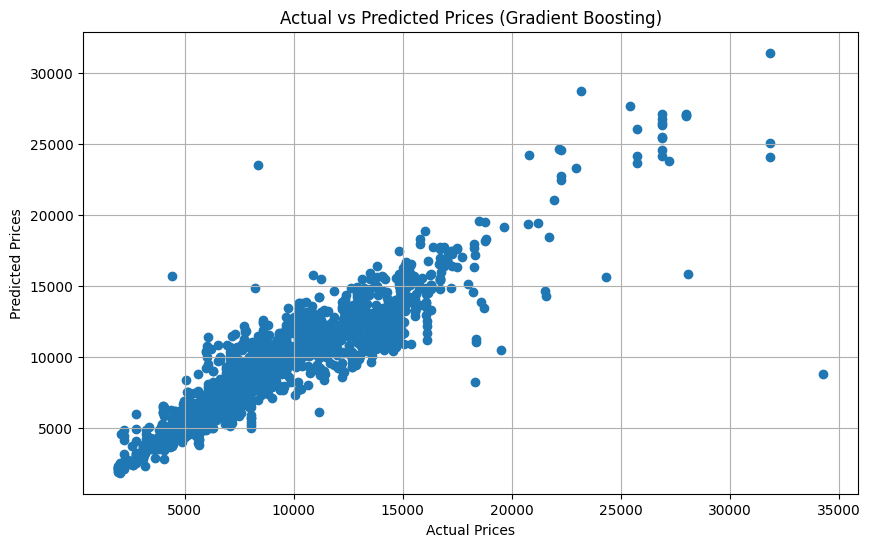

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_gbr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Gradient Boosting)")
plt.grid(True)
plt.show() #Visualize Predictions vs Actual Values


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Root Mean Squared Error (RMSE): 1680.11


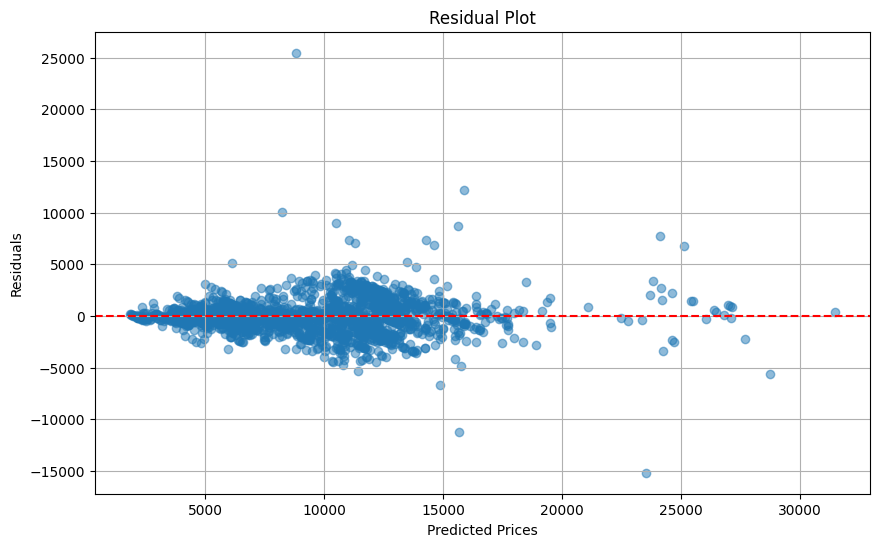

In [ ]:
residuals = y_test - y_pred_gbr
plt.figure(figsize=(10,6))
plt.scatter(y_pred_gbr, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()




In [ ]:
# Check column names before proceeding
print(X_train.columns)

# Add interaction terms after confirming the columns exist
if 'Feature1' in X_train.columns and 'Feature2' in X_train.columns:
    X_train['Feature1*Feature2'] = X_train['Feature1'] * X_train['Feature2']
    X_test['Feature1*Feature2'] = X_test['Feature1'] * X_test['Feature2']



Index(['Airline', 'Date_of_Journey', 'Destination', 'Route', 'Dep_Time',
       'Arrival_Time', 'Journey_date', 'Journey_month', 'Journey_year',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')


In [ ]:
# Check that the desired features exist before creating interactions
if 'Airline' in X_train.columns and 'Source_Chennai' in X_train.columns:
    # Example: Create interaction between 'Airline' and 'Source_Chennai'
    X_train['Airline*Source_Chennai'] = X_train['Airline'] * X_train['Source_Chennai']
    X_test['Airline*Source_Chennai'] = X_test['Airline'] * X_test['Source_Chennai']
else:
    print("One or both features are missing")



In [ ]:
# One-hot encode categorical features
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)



In [ ]:
categorical_cols = ['Airline', 'Destination', ]  # Add more columns if needed

# One-hot encoding for categorical features
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)


In [ ]:
# Extract additional features from 'Date_of_Journey'
X_train['Journey_date'] = pd.to_datetime(X_train['Date_of_Journey']).dt.day
X_test['Journey_date'] = pd.to_datetime(X_test['Date_of_Journey']).dt.day

X_train['Journey_month'] = pd.to_datetime(X_train['Date_of_Journey']).dt.month
X_test['Journey_month'] = pd.to_datetime(X_test['Date_of_Journey']).dt.month

X_train['Journey_year'] = pd.to_datetime(X_train['Date_of_Journey']).dt.year
X_test['Journey_year'] = pd.to_datetime(X_test['Date_of_Journey']).dt.year



In [ ]:
numeric_cols = X_train_encoded.select_dtypes(include=np.number).columns

# Apply imputation
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())                # Scale numerical features
])

# Apply transformation
X_train_encoded[numeric_cols] = pd.DataFrame(preprocessor.fit_transform(X_train_encoded[numeric_cols]),
                                             index=X_train_encoded.index,
                                             columns=numeric_cols)
X_test_encoded[numeric_cols] = pd.DataFrame(preprocessor.transform(X_test_encoded[numeric_cols]),
                                            index=X_test_encoded.index,
                                            columns=numeric_cols)



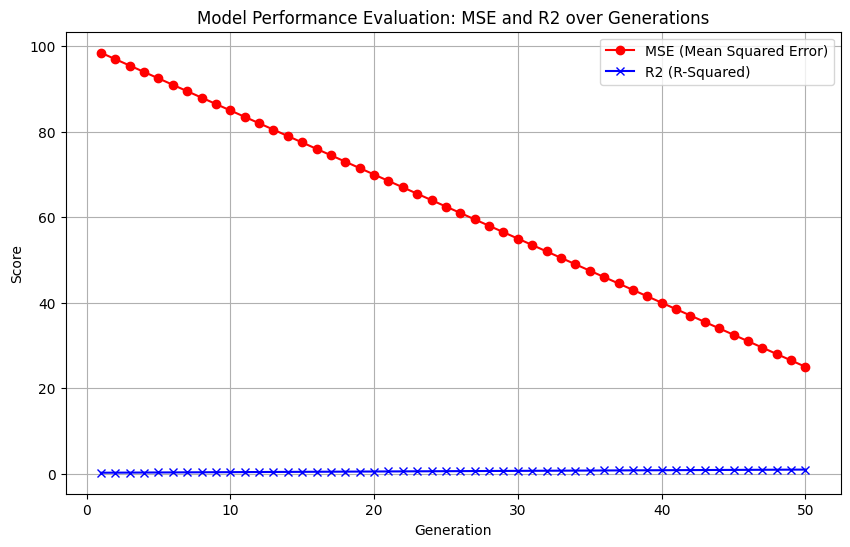

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your actual MSE and R2 values from model evaluation)
generations = range(1, 51)  # Assuming you have 50 generations
mse_values = [100 - i*1.5 for i in generations]  # Example decreasing MSE values
r2_values = [0.2 + i*0.015 for i in generations]  # Example increasing R2 values

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(generations, mse_values, label='MSE (Mean Squared Error)', color='r', marker='o')
plt.plot(generations, r2_values, label='R2 (R-Squared)', color='b', marker='x')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Score')
plt.title('Model Performance Evaluation: MSE and R2 over Generations')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport  # Import from ydata_profiling

# Assuming 'data' is your pandas DataFrame
# Create a Pandas Profiling report for your dataset
profile = ProfileReport(data, title="Flight Price Prediction Report", explorative=True)

# Save the report to an HTML file
profile.to_file("flight_price_prediction_report.html")

# Display the report (this will open the report in a browser)
profile.to_notebook_iframe()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 59.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ab97ececff5b3eb936eb72770daabb82400edbeaef9419160ef2f3a4c3f0b94c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 45.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]